## Naive Bayes - NB

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
data = pd.read_csv('ecosystem_data.csv')
data

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,degraded
1,95.071431,99.873629,0.184512,45.929245,4.021498,degraded
2,73.199394,52.846174,0.346640,96.449852,4.194976,degraded
3,59.865848,182.180001,0.663281,21.897845,4.493691,degraded
4,15.601864,142.987248,0.482089,58.785642,4.620093,degraded
...,...,...,...,...,...,...
9995,85.765599,263.111589,0.952275,75.403391,6.923449,degraded
9996,89.750884,14.044187,0.747824,76.452694,4.744065,at risk
9997,94.670792,91.109541,0.019456,26.956943,7.619473,degraded
9998,39.748799,132.996002,0.401005,43.431977,6.365560,degraded


In [4]:
data['ecosystem_health'].unique()

array(['degraded', 'at risk', 'healthy'], dtype=object)

In [5]:
# Encode target lables
data['ecosystem_health'] = data['ecosystem_health'].map({'healthy':0, 
                                                         'at risk':1, 
                                                         'degraded':2})

In [6]:
data.ecosystem_health

0       2
1       2
2       2
3       2
4       2
       ..
9995    2
9996    1
9997    2
9998    2
9999    2
Name: ecosystem_health, Length: 10000, dtype: int64

In [7]:
# Feature selection
X = data.drop('ecosystem_health', axis=1)
y = data['ecosystem_health']

In [8]:
X.shape

(10000, 5)

In [9]:
y.shape

(10000,)

In [10]:
# Splitting the dataset for training and testings sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(8000, 5)

In [12]:
X_test.shape

(2000, 5)

In [13]:
# Initialise the model and train it
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = model.predict(X_test)
y_pred

array([2, 2, 1, ..., 2, 2, 2])

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is', accuracy)

Accuracy is 0.9515


In [17]:
# Classification report
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=['Healthy', 'At Risk', 'Degraded']))

Classification Report
              precision    recall  f1-score   support

     Healthy       0.86      0.29      0.43        21
     At Risk       0.90      0.63      0.74       222
    Degraded       0.96      1.00      0.98      1757

    accuracy                           0.95      2000
   macro avg       0.91      0.64      0.72      2000
weighted avg       0.95      0.95      0.95      2000



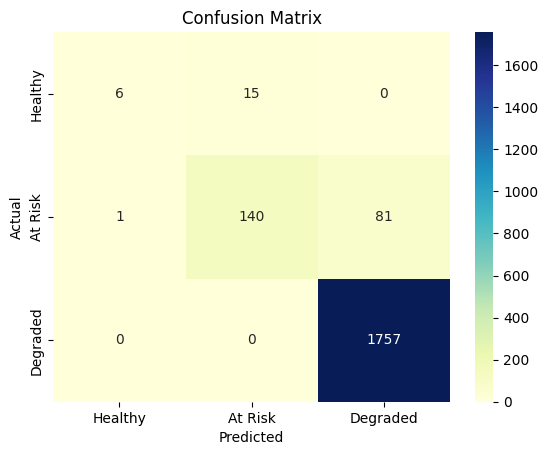

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
           xticklabels=['Healthy', 'At Risk', 'Degraded'],
           yticklabels=['Healthy', 'At Risk', 'Degraded'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()